In [160]:
# Bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os 
# Configurações de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('viridis')
%matplotlib inline

# Para evitar warnings
import warnings
warnings.filterwarnings('ignore')

In [49]:
# Leitura do arquivo
df = pd.read_csv('Spotify_Youtube 1.csv')

# Exibindo as 5 primeiras linhas
df.head()


Unnamed: 0    Artist                                        Url_spotify  \
0           0  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1           1  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2           2  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3           3  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4           4  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   

                                           Track  \
0                                 Feel Good Inc.   
1                                Rhinestone Eyes   
2  New Gold (feat. Tame Impala and Bootie Brown)   
3                             On Melancholy Hill   
4                                 Clint Eastwood   

                                           Album Album_type  \
0                                     Demon Days      album   
1                                  Plastic Beach      album   
2  New Gold (feat. Tame Impala and Bootie Brown)     single   
3                                  Plastic Beach      album   
4                                       Gorillaz      album   

                                    Uri  Danceability  Energy   Key  ...  \
0  spotify:track:0d28khcov6AiegSCpG5TuT         0.818   0.705   6.0  ...   
1  spotify:track:1foMv2HQwfQ2vntFf9HFeG         0.676   0.703   8.0  ...   
2  spotify:track:64dLd6rVqDLtkXFYrEUHIU         0.695   0.923   1.0  ...   
3  spotify:track:0q6LuUqGLUiCPP1cbdwFs3         0.689   0.739   2.0  ...   
4  spotify:track:7yMiX7n9SBvadzox8T5jzT         0.663   0.694  10.0  ...   

                                   Url_youtube  \
0  https://www.youtube.com/watch?v=HyHNuVaZJ-k   
1  https://www.youtube.com/watch?v=yYDmaexVHic   
2  https://www.youtube.com/watch?v=qJa-VFwPpYA   
3  https://www.youtube.com/watch?v=04mfKJWDSzI   
4  https://www.youtube.com/watch?v=1V_xRb0x9aw   

                                               Title   Channel        Views  \
0         Gorillaz - Feel Good Inc. (Official Video)  Gorillaz  693555221.0   
1  Gorillaz - Rhinestone Eyes [Storyboard Film] (...  Gorillaz   72011645.0   
2  Gorillaz - New Gold ft. Tame Impala & Bootie B...  Gorillaz    8435055.0   
3     Gorillaz - On Melancholy Hill (Official Video)  Gorillaz  211754952.0   
4         Gorillaz - Clint Eastwood (Official Video)  Gorillaz  618480958.0   

       Likes  Comments                                        Description  \
0  6220896.0  169907.0  Official HD Video for Gorillaz' fantastic trac...   
1  1079128.0   31003.0  The official video for Gorillaz - Rhinestone E...   
2   282142.0    7399.0  Gorillaz - New Gold ft. Tame Impala & Bootie B...   
3  1788577.0   55229.0  Follow Gorillaz online:\nhttp://gorillaz.com \...   
4  6197318.0  155930.0  The official music video for Gorillaz - Clint ...   

   Licensed official_video        Stream  
0      True           True  1.040235e+09  
1      True           True  3.100837e+08  
2      True           True  6.306347e+07  
3      True           True  4.346636e+08  
4      True           True  6.172597e+08  

[5 rows x 28 columns]

In [50]:
# Verificar as dimensões do dataset
print(f'O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

O dataset possui 20718 linhas e 28 colunas.


In [51]:
# Verificar os tipos de dados
df.dtypes

Unnamed: 0            int64
Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
official_video       object
Stream              float64
dtype: object

In [52]:
# Verificar se há valores nulos
df.isnull().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [53]:
# Remover linhas com valores nulos nas colunas importantes
colunas_criticas = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
                    'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms',
                    'Views', 'Likes', 'Comments', 'Stream']

# Drop linhas com nulos nessas colunas
df = df.dropna(subset=colunas_criticas)

# Checar novamente os dados
print(f'Dataset após limpeza: {df.shape[0]} linhas e {df.shape[1]} colunas.')
df.isnull().sum()

Dataset após limpeza: 19549 linhas e 28 colunas.


Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          0
Energy                0
Key                   0
Loudness              0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Duration_ms           0
Url_youtube           0
Title                 0
Channel               0
Views                 0
Likes                 0
Comments              0
Description         379
Licensed              0
official_video        0
Stream                0
dtype: int64

## Tratamento de Valores Nulos

Inicialmente, identifiquei a presença de valores nulos em diversas colunas do dataset. Para garantir a integridade das análises subsequentes, optei por remover as linhas que continham valores nulos nas colunas consideradas críticas para o estudo, como 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments' e 'Stream'.

A decisão de remover essas linhas foi tomada com o objetivo de evitar a introdução de vieses ou erros em modelos e visualizações que dependem dessas variáveis. Embora essa abordagem tenha resultado na exclusão de aproximadamente 5.6% das observações originais, considerei que a manutenção da qualidade e da confiabilidade dos dados para as análises principais é prioritária.

É importante notar que outras estratégias de tratamento de valores nulos, como a imputação (preenchimento com valores médios, medianos ou outros), poderiam ser consideradas em diferentes contextos. No entanto, para este projeto específico e considerando a natureza das colunas com valores faltantes, julguei a remoção das linhas afetadas a abordagem mais adequada para garantir a robustez das conclusões.

In [55]:
# Verificar estatísticas iniciais
df.describe()

Unnamed: 0  Danceability        Energy           Key      Loudness  \
count  19549.000000  19549.000000  19549.000000  19549.000000  19549.000000   
mean   10409.282777      0.621059      0.635170      5.294337     -7.633179   
std     5987.965438      0.165489      0.213555      3.579338      4.618839   
min        0.000000      0.000000      0.000020      0.000000    -46.251000   
25%     5214.000000      0.519000      0.508000      2.000000     -8.772000   
50%    10434.000000      0.639000      0.666000      5.000000     -6.516000   
75%    15620.000000      0.742000      0.797000      8.000000     -4.929000   
max    20717.000000      0.975000      1.000000     11.000000      0.920000   

        Speechiness  Acousticness  Instrumentalness      Liveness  \
count  19549.000000  19549.000000      19549.000000  19549.000000   
mean       0.095392      0.289106          0.055292      0.191226   
std        0.106243      0.285908          0.192519      0.165197   
min        0.000000      0.000001          0.000000      0.014500   
25%        0.035700      0.044400          0.000000      0.094000   
50%        0.050700      0.190000          0.000002      0.125000   
75%        0.104000      0.470000          0.000433      0.234000   
max        0.964000      0.996000          1.000000      1.000000   

            Valence         Tempo   Duration_ms         Views         Likes  \
count  19549.000000  19549.000000  1.954900e+04  1.954900e+04  1.954900e+04   
mean       0.528950    120.605702  2.246281e+05  9.545626e+07  6.700487e+05   
std        0.245228     29.619340  1.269126e+05  2.775744e+08  1.805054e+06   
min        0.000000      0.000000  3.098500e+04  2.600000e+01  0.000000e+00   
25%        0.339000     96.990000  1.802400e+05  1.911528e+06  2.238000e+04   
50%        0.536000    119.964000  2.132530e+05  1.491440e+07  1.279090e+05   
75%        0.725000    139.951000  2.519200e+05  7.152989e+07  5.266400e+05   
max        0.993000    243.372000  4.676058e+06  8.079649e+09  5.078865e+07   

           Comments        Stream  
count  1.954900e+04  1.954900e+04  
mean   2.786371e+04  1.371101e+08  
std    1.959074e+05  2.463589e+08  
min    0.000000e+00  6.574000e+03  
25%    5.310000e+02  1.781089e+07  
50%    3.343000e+03  4.979139e+07  
75%    1.449300e+04  1.390828e+08  
max    1.608314e+07  3.386520e+09

## Análise Comparativa YouTube vs. Spotify: Insights das Estatísticas Descritivas

A tabela acima apresenta as estatísticas descritivas das variáveis numéricas do conjunto de dados, incluindo 'Views' (YouTube) e 'Stream' (Spotify). A análise dessas estatísticas revela algumas diferenças importantes no comportamento dos dados nas duas plataformas:

* **Média vs. Mediana:**
    * **Views:** A média de visualizações (9.545626e+07) é consideravelmente maior que a mediana (1.491440e+07). Isso indica uma distribuição assimétrica positiva, onde alguns vídeos têm um número extremamente alto de visualizações, puxando a média para cima.
    * **Stream:** Da mesma forma, a média de streams (1.371101e+08) é maior que a mediana (4.979139e+07), mostrando uma assimetria positiva também no Spotify, mas a diferença relativa entre média e mediana é menor do que no YouTube.

* **Dispersão (Desvio Padrão):**
    * **Views:** O desvio padrão para visualizações (2.775744e+08) é muito alto, indicando uma grande variabilidade no número de visualizações entre os vídeos. Isso sugere que alguns vídeos têm um sucesso explosivo, enquanto muitos outros têm um número relativamente baixo de visualizações.
    * **Stream:** O desvio padrão para streams (2.463589e+08) também é alto, mas menor que o de 'Views', sugerindo uma menor variabilidade relativa em comparação com o YouTube.

* **Valores Mínimos e Máximos:**
    * **Views:** O valor mínimo de visualizações é muito baixo (26), enquanto o máximo é extremamente alto (8.079649e+09). Essa enorme amplitude reforça a ideia de que o sucesso no YouTube pode variar drasticamente.
    * **Stream:** O valor mínimo de streams (6.574e+03) é consideravelmente maior que o mínimo de visualizações, e o máximo (3.386520e+09) também é menor que o máximo de visualizações. Isso pode sugerir que, embora o Spotify também tenha hits, a variação extrema de popularidade pode ser menos pronunciada do que no YouTube.

* **Quartis:**
    * Comparando os quartis (25%, 50%, 75%), observa-se que os valores de 'Views' crescem mais rapidamente que os valores de 'Stream'. Isso indica que a distribuição de 'Views' é mais dispersa para valores altos, enquanto a distribuição de 'Stream' é mais concentrada.

**Implicações e Possíveis Interpretações:**

* A maior assimetria e variabilidade nas visualizações do YouTube podem refletir a natureza da plataforma, onde vídeos podem se tornar virais e alcançar audiências muito maiores do que as que normalmente consomem música no Spotify.
* O Spotify, sendo uma plataforma de streaming de música, pode ter um consumo mais consistente, com menos "picos" extremos de popularidade.
* As diferenças nos valores mínimos podem indicar que o YouTube tem uma barreira de entrada mais baixa para conteúdo (qualquer um pode postar um vídeo), enquanto o Spotify está mais ligado a lançamentos musicais formais.

É importante lembrar que essas são apenas observações iniciais baseadas nas estatísticas descritivas. Uma análise mais aprofundada pode envolver a comparação direta de músicas entre as plataformas (se possível), a análise de características musicais e outros fatores contextuais.

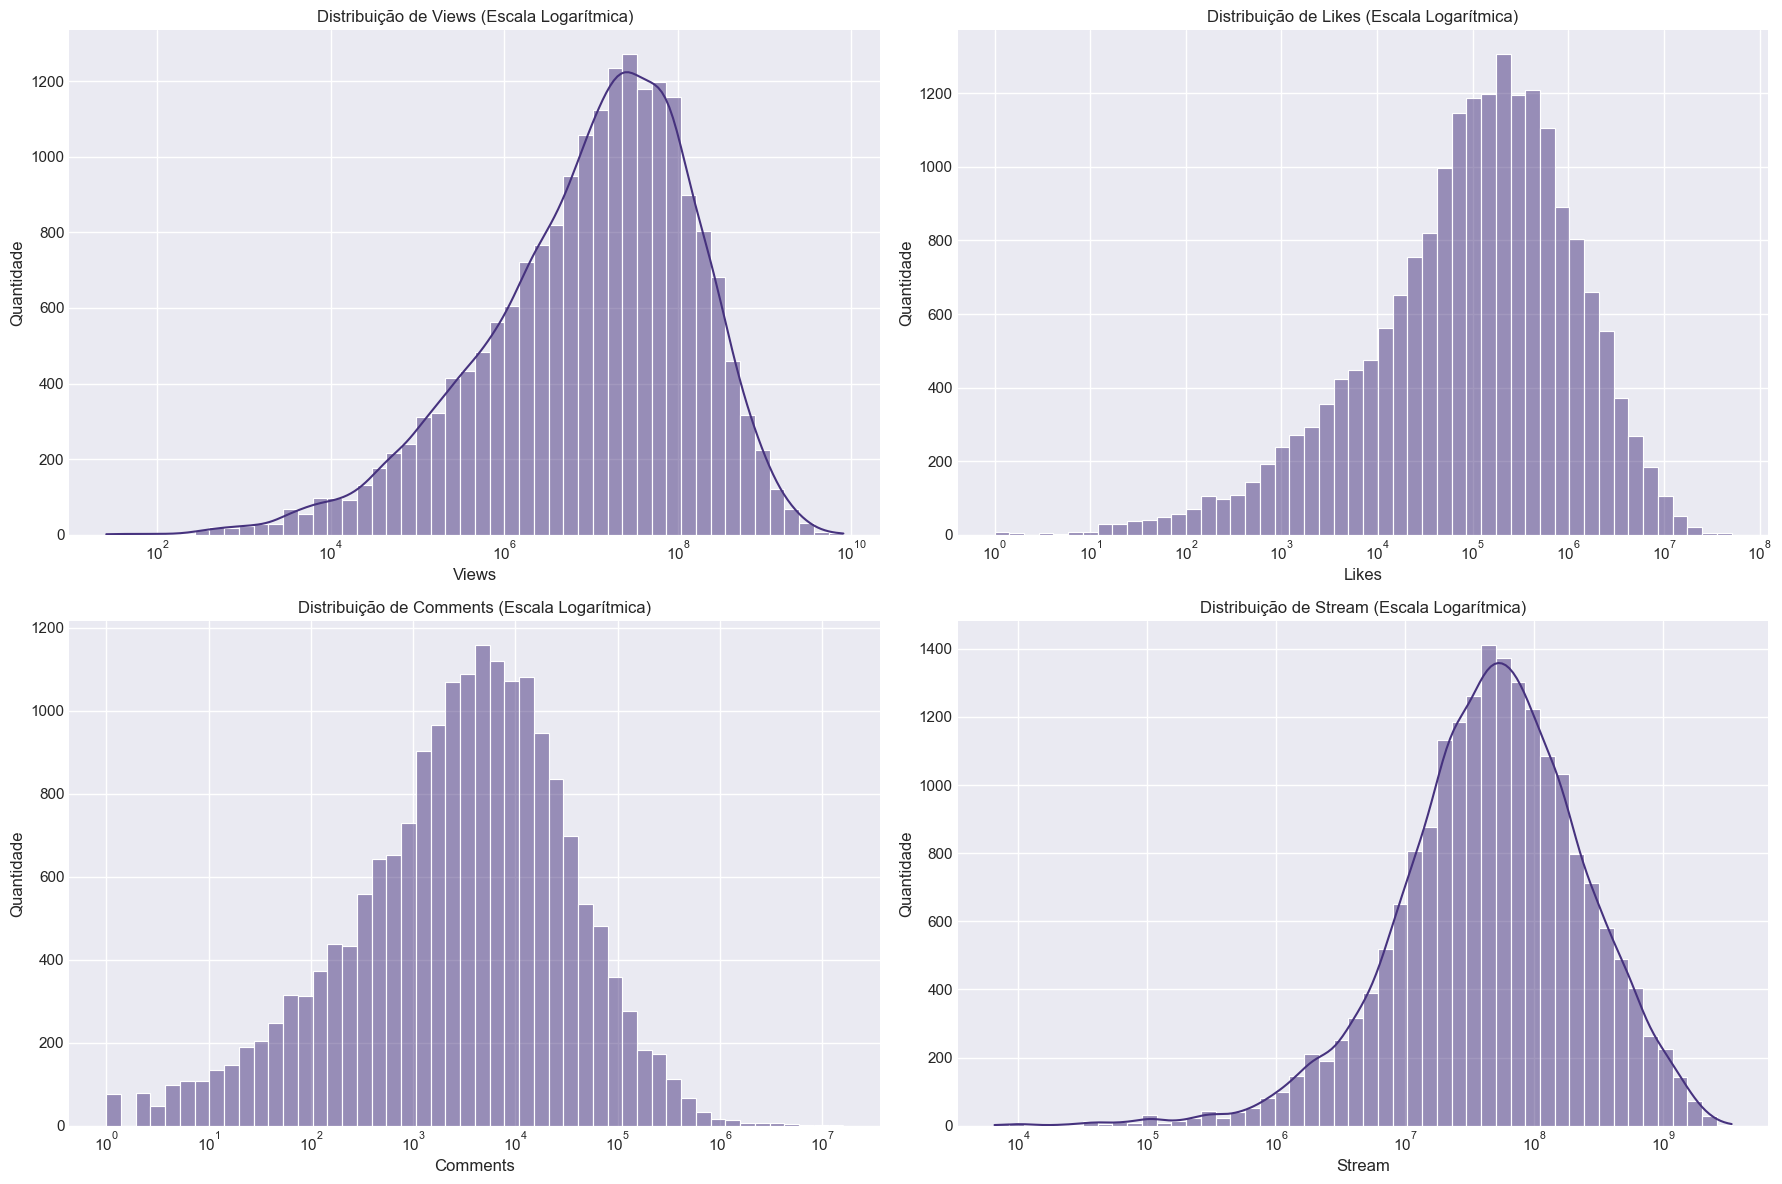

In [155]:
# Histogramas mostrando a distribuição (em escala logarítmica) de Views, Likes, Comments e Stream

plt.figure(figsize=(18, 12))

for i, var in enumerate(variaveis, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[var], bins=50, kde=True, log_scale=True) # Adicionando log_scale=True
    plt.title(f'Distribuição de {var} (Escala Logarítmica)')
    plt.xlabel(var)
    plt.ylabel('Quantidade')

plt.tight_layout()
plt.show()

## Insights do Histograma para Comparativo YouTube vs. Spotify

O histograma com escala logarítmica oferece uma visualização eficaz da distribuição das variáveis 'Views', 'Likes', 'Comments' (YouTube) e 'Stream' (Spotify), permitindo uma comparação entre o comportamento dos dados nas duas plataformas.

**Principais Insights:**

* **Assimetria Positiva Geral:** Todas as quatro métricas (Views, Likes, Comments e Stream) apresentam uma assimetria positiva pronunciada. Isso significa que a maioria das músicas/vídeos acumula um número relativamente baixo de visualizações, curtidas, comentários ou reproduções, enquanto apenas alguns alcançam níveis extremamente altos de popularidade. Esse padrão é comum em dados de popularidade, onde o sucesso tende a ser altamente concentrado em um pequeno subconjunto de itens.

* **Forte Correlação Visual entre Views, Likes e Comments:** Os histogramas de 'Views', 'Likes' e 'Comments' exibem formas muito semelhantes, sugerindo uma forte interdependência entre essas métricas no YouTube. Visualmente, o aumento em uma dessas métricas corresponde a um aumento nas outras, o que está alinhado com a alta correlação numérica observada anteriormente.

* **Distribuição de Stream Distinta:** Embora 'Stream' também apresente assimetria positiva, sua distribuição difere ligeiramente das distribuições do YouTube. A distribuição de 'Stream' parece ser mais concentrada em valores intermediários e tem uma cauda menos extensa em comparação com 'Views'. Essa diferença sugere que a dinâmica de popularidade no Spotify pode ser distinta da do YouTube, com menos ocorrências de valores extremos.

* **Implicações da Escala Logarítmica:** A escala logarítmica é essencial para visualizar essas distribuições, pois acomoda a ampla faixa de valores e revela padrões que seriam obscurecidos em uma escala linear. Ela permite comparar a *forma* das distribuições, em vez de apenas a magnitude absoluta dos valores.

* **Interpretação Comparativa:**
    * O YouTube parece ter uma maior variabilidade no sucesso, com alguns vídeos alcançando números extraordinariamente altos de visualizações, likes e comentários. Isso pode refletir a natureza do YouTube como uma plataforma de vídeo, onde o conteúdo pode se tornar viral e atingir um público muito amplo.
    * O Spotify, por outro lado, pode ter uma distribuição de popularidade mais "suave", com menos ocorrências de valores extremos. Isso pode indicar um consumo de música mais consistente, com menos flutuações drásticas de popularidade.

Em resumo, o histograma fornece uma representação visual clara das diferenças na distribuição de popularidade entre YouTube e Spotify. Ele reforça a ideia de que, embora ambas as plataformas exibam assimetria positiva, o YouTube parece ter uma maior propensão a extremos de popularidade, enquanto o Spotify pode apresentar um padrão de consumo mais estável.

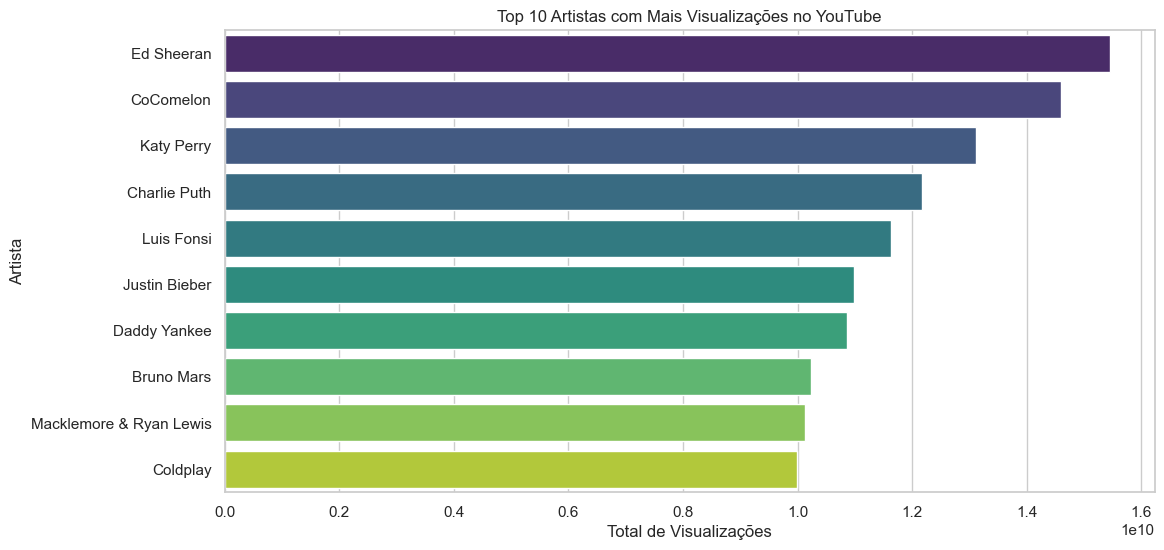

In [60]:
# Top 10 artistas por visualizações no YouTube 
top_artistas = df.groupby('Artist')['Views'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artistas.values, y=top_artistas.index, palette="viridis")
plt.title('Top 10 Artistas com Mais Visualizações no YouTube')
plt.xlabel('Total de Visualizações')
plt.ylabel('Artista')
plt.show()


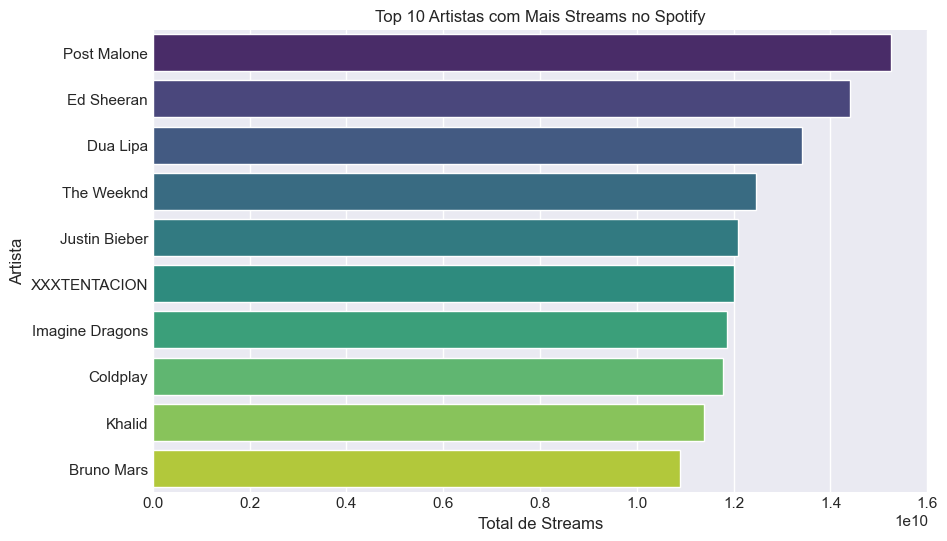

In [148]:
# Top 10 artistas por visualizações no Spotify
artist_streams = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=artist_streams.values, y=artist_streams.index, palette='viridis')
plt.xlabel('Total de Streams')
plt.ylabel('Artista')
plt.title('Top 10 Artistas com Mais Streams no Spotify')
plt.show()

### Análise Comparativa do Desempenho por Artista no YouTube e Spotify

Para entender melhor as diferenças na popularidade musical entre o YouTube e o Spotify, analisamos o desempenho dos artistas em cada plataforma, identificando os 10 artistas com mais visualizações no YouTube e os 10 artistas com mais streams no Spotify.

**Desempenho no YouTube:**

O gráfico "Top 10 Artistas com Mais Visualizações no YouTube" revela que artistas como Ed Sheeran, CoComelon e Katy Perry lideram em visualizações. A presença de CoComelon, um canal de conteúdo infantil, destaca a diversidade de conteúdo popular no YouTube, que vai além da música tradicional. Outros artistas pop de grande sucesso, como Justin Bieber, Bruno Mars e Daddy Yankee, também figuram na lista, indicando a forte presença da música pop na plataforma.

**Desempenho no Spotify:**

Por outro lado, o gráfico "Top 10 Artistas com Mais Streams no Spotify"  mostra que artistas como Post Malone, Ed Sheeran e Dua Lipa estão no topo em streams. A lista do Spotify também é dominada por artistas pop, mas com uma inclinação para artistas que são particularmente populares no contexto do streaming de música.

**Comparação e Insights:**

Ao comparar as duas listas, observamos alguns padrões interessantes:

* **Ed Sheeran:** É um dos artistas com melhor desempenho em ambas as plataformas, indicando sua ampla popularidade e capacidade de atrair tanto espectadores de vídeo quanto ouvintes de streaming.
* **Divergências:** Artistas como CoComelon têm um desempenho excepcionalmente bem no YouTube, mas não aparecem no Top 10 do Spotify, o que destaca as diferenças nos hábitos de consumo e no público entre as plataformas. O YouTube atrai um público mais amplo e diversificado, enquanto o Spotify é focado no consumo de música.
* **Foco no Áudio vs. Visual:** O Spotify é uma plataforma de áudio, então o sucesso é impulsionado principalmente pela música em si. No YouTube, o apelo visual (videoclipes, apresentações ao vivo, etc.) também desempenha um papel importante.

**Conclusão:**

A análise do desempenho por artista revela que, embora haja sobreposição na popularidade de alguns artistas importantes, existem diferenças distintas nos artistas que se destacam em cada plataforma. Essas diferenças refletem as características únicas de cada plataforma e os diferentes comportamentos do usuário.

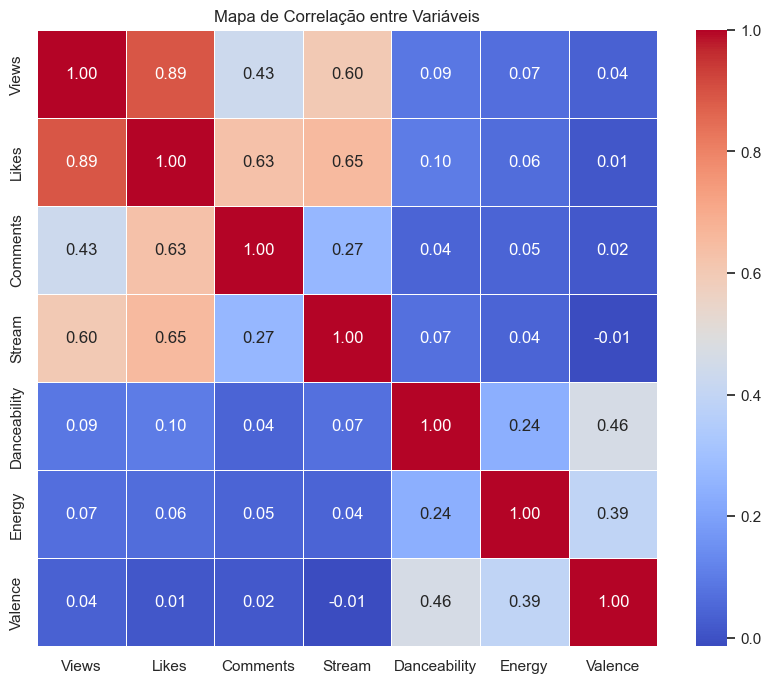

In [62]:
# Matriz de correlação
corr = df[['Views', 'Likes', 'Comments', 'Stream', 'Danceability', 'Energy', 'Valence']].corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Correlação entre Variáveis')
plt.show()


## Análise da Matriz de Correlação

A matriz de correlação apresenta as relações lineares entre as variáveis 'Views', 'Likes', 'Comments', 'Stream', 'Danceability', 'Energy' e 'Valence'. As cores mais quentes (tons de vermelho) indicam correlações positivas fortes, enquanto as cores mais frias (tons de azul) sinalizam correlações negativas. Valores próximos de zero (cores mais claras) sugerem uma correlação linear fraca ou inexistente.

**Principais Observações:**

* **Forte Correlação Positiva:** Notamos uma correlação muito forte entre 'Views' e 'Likes' (0.89), o que é esperado, pois vídeos populares tendem a receber mais curtidas. Também observamos uma correlação positiva considerável entre 'Views' e 'Stream' (0.60), e entre 'Likes' e 'Stream' (0.65), sugerindo uma relação entre a popularidade no YouTube e no Spotify. Além disso, 'Comments' e 'Likes' (0.63) também apresentam uma correlação positiva moderada.

* **Correlações Fracas com Características Musicais:** As características musicais 'Danceability', 'Energy' e 'Valence' exibem correlações muito baixas com as métricas de popularidade ('Views', 'Likes', 'Comments', 'Stream'). Isso indica que, linearmente, essas características isoladas não são fortes preditores diretos do sucesso em termos de engajamento ou número de reproduções nas plataformas.

* **Correlação Negativa Próxima de Zero:** A correlação entre 'Valence' e 'Stream' (-0.01) é praticamente nula, sugerindo que, linearmente, a "felicidade" ou "tristeza" da música não tem um impacto direto no número de streams.

**Implicações para Análise:**

Esses resultados sugerem que o engajamento no YouTube (visualizações e curtidas) está fortemente interligado e também possui uma relação positiva com o sucesso no Spotify (streams). No entanto, prever o sucesso com base apenas nas características musicais lineares pode ser desafiador. Análises futuras poderiam explorar relações não lineares ou a combinação dessas características para identificar padrões mais complexos que influenciam a popularidade.

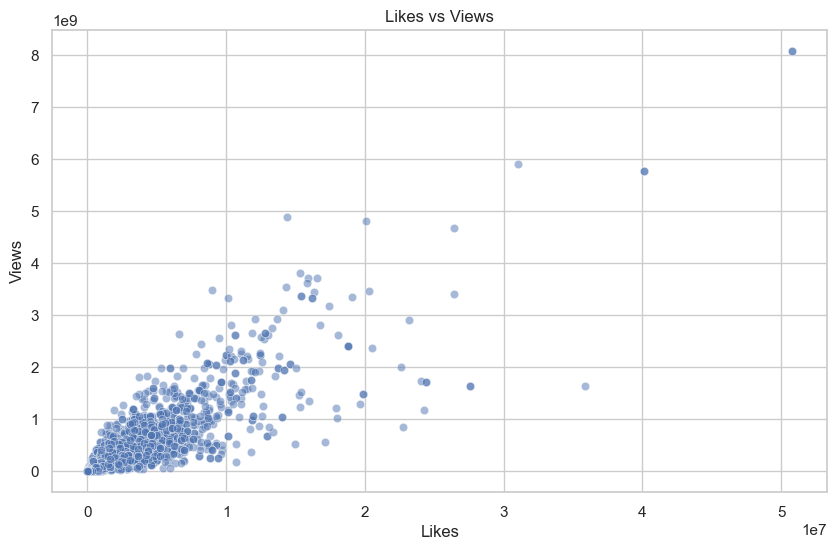

In [64]:
# Scatter de Likes vs Views
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Likes', y='Views', alpha=0.5)
plt.title('Likes vs Views')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.show()


## Análise do Scatter Plot: Likes vs Views

O gráfico de dispersão que compara 'Likes' e 'Views' revela uma **forte correlação positiva** entre essas duas variáveis, o que já era indicado pela alta correlação numérica na matriz anterior (0.89). Podemos observar uma tendência clara de que, à medida que o número de 'Likes' aumenta, o número de 'Views' também tende a aumentar. Os pontos no gráfico se agrupam em uma direção ascendente, reforçando essa relação linear positiva.

**Insight Adicional:**

A forte relação linear observada sugere que 'Likes' podem ser um bom indicador do número de 'Views' de um vídeo, e vice-versa. Essa informação pode ser útil para identificar vídeos com um engajamento acima ou abaixo do esperado em relação ao seu número de visualizações. Por exemplo, um vídeo com muitas visualizações, mas relativamente poucos likes, poderia indicar uma taxa de engajamento menor do que a média.

Em resumo, o scatter plot complementa a análise da matriz de correlação, fornecendo uma representação visual clara da relação linear entre 'Likes' e 'Views', o que é valioso para a compreensão dos dados.

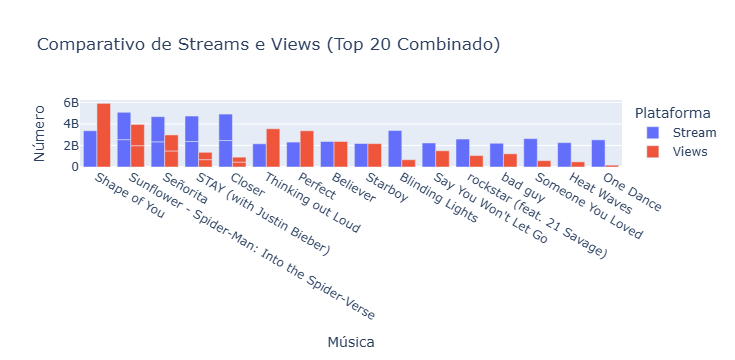

In [96]:
top_songs = df.nlargest(20, ['Stream', 'Views']).melt(id_vars=['Track'], value_vars=['Stream', 'Views'], var_name='Platform', value_name='Value')

fig = px.bar(top_songs, x='Track', y='Value', color='Platform', barmode='group',
             title='Comparativo de Streams e Views (Top 20 Combinado)',
             labels={'Value': 'Número', 'Track': 'Música', 'Platform': 'Plataforma'})
fig.update_layout(xaxis={'categoryorder':'total descending'}) # Ordena por valor total
fig.show()


## Comparativo de Streams e Views (Top 20 Combinado) - Insights

O gráfico de barras interativo apresenta uma comparação do número de streams no Spotify (azul) e visualizações no YouTube (vermelho) para as 20 músicas com a maior popularidade combinada nessas plataformas. Ao analisar o gráfico, podemos observar alguns padrões interessantes:

* **Dominância em Ambas as Plataformas:** Músicas como "Shape of You" e "Blinding Lights" demonstram um sucesso massivo em ambas as plataformas, com bilhões de streams e visualizações. Isso indica um apelo global e consistente para essas faixas.

* **Forte Desempenho no Spotify:** Algumas músicas, como "Señorita" e "STAY (with Justin Bieber)", exibem um número de streams significativamente maior do que o de visualizações no YouTube entre as músicas de maior popularidade combinada. Isso pode sugerir que essas faixas têm uma forte presença e são preferidas pelos usuários do Spotify.

* **Popularidade Mais Equilibrada:** Outras músicas, como "Sunflower - Spider-Man: Into the Spider-Verse" e "Thinking out Loud", mostram uma diferença menor entre o número de streams e visualizações, indicando uma popularidade mais uniforme entre as duas plataformas para esses títulos.

* **Potenciais Diferenças no Comportamento do Usuário:** As diferenças observadas podem refletir distintos padrões de comportamento do usuário entre as plataformas. O Spotify, sendo primariamente uma plataforma de streaming de áudio, pode ter um maior engajamento para certas músicas, enquanto o YouTube, com seu componente visual, pode impulsionar as visualizações de outras.

* **Considerações sobre a Metodologia:** A seleção das "Top 20" músicas com base na soma de streams e visualizações pode favorecer músicas com números muito altos em uma plataforma, mesmo que o desempenho na outra seja relativamente menor. Analisar os tops de cada plataforma separadamente também pode fornecer insights valiosos.

Em resumo, o gráfico interativo permite uma comparação direta da popularidade das músicas nas duas maiores plataformas de consumo de música e vídeo. As diferenças observadas sugerem que, embora haja um núcleo de músicas de sucesso universal, algumas faixas podem ter uma preferência de plataforma mais acentuada.

In [117]:
# Calcular a taxa de engajamento
df['Engajamento'] = ((df['Likes'] + df['Comments']) / df['Views']) * 100

# Ranking das músicas por engajamento
top_engajamento = df[['Track', 'Artist', 'Views', 'Likes', 'Comments', 'Engajamento']].sort_values(by='Engajamento', ascending=False).head(10)

top_engajamento

Track    Artist      Views     Likes  \
19968                                  Intro    j-hope   954081.0  237761.0   
19969                            Safety Zone    j-hope  1952637.0  453910.0   
19967                                 Future    j-hope  1180522.0  250116.0   
19971                          Pandora's Box    j-hope  1265231.0  253702.0   
12193                              Resistiré    Camila       49.0       9.0   
16297           My Universe - Galantis Remix  Galantis  2067753.0  371437.0   
15065                    Burn It (feat. MAX)       MAX  1054438.0  188244.0   
8105                  No.2 (with parkjiyoon)        RM  2050047.0  346440.0   
8104                     Hectic (with Colde)        RM  1910843.0  305506.0   
14564  Bad Decisions (with BTS & Snoop Dogg)       BTS  4844158.0  775430.0   

       Comments  Engajamento  
19968    4061.0    25.346066  
19969   13499.0    23.937322  
19967    7461.0    21.818907  
19971    5533.0    20.489144  
12193       1.0    20.408163  
16297   13429.0    18.612765  
15065    3170.0    18.153177  
8105    11652.0    17.467502  
8104     8862.0    16.451796  
14564   16014.0    16.338113

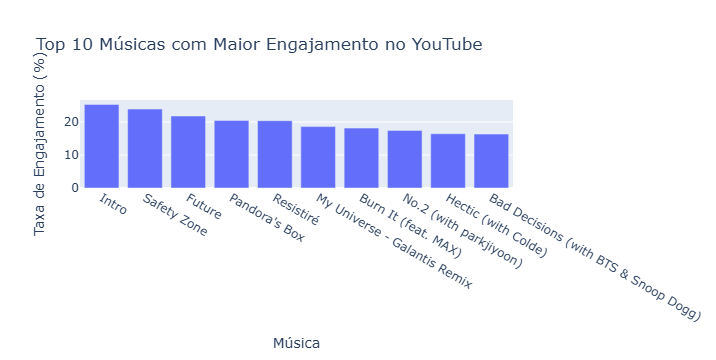

In [121]:
# Gráfico de barras para o Top 10 Engajamento
fig_engajamento = px.bar(top_engajamento, x='Track', y='Engajamento',
                       title='Top 10 Músicas com Maior Engajamento no YouTube',
                       labels={'Track': 'Música', 'Engajamento': 'Taxa de Engajamento (%)'},
                       hover_data=['Artist', 'Views', 'Likes', 'Comments']) # Informações extras ao passar o mouse
fig_engajamento.show()

## Análise do Ranking de Engajamento no YouTube (Top 10)

Esta análise examina o ranking das 10 músicas com a maior taxa de engajamento no YouTube. A taxa de engajamento foi calculada a partir de curtidas, comentários e visualizações, e os resultados são apresentados tanto em formato de tabela quanto em um gráfico de barras para facilitar a interpretação.

**Visão Geral do Engajamento:**

As taxas de engajamento das 10 músicas mais engajadoras variam de aproximadamente 16% a 25%, indicando um nível geral de interação relativamente alto do público em relação ao número de visualizações. Essa consistência sugere que o conteúdo selecionado para esta análise é eficaz em estimular a participação do espectador.

**Destaque para "Intro":**

A música "Intro" se destaca como a líder em taxa de engajamento, demonstrando uma capacidade excepcional de gerar likes e comentários proporcionalmente ao seu número de visualizações. Essa liderança sugere que "Intro" possui características que incentivam fortemente a interação do público.

**Tendência de Declínio Gradual:**

Observa-se uma tendência de declínio gradual na taxa de engajamento à medida que se percorre o ranking, da primeira à décima posição. Embora todas as músicas exibam alto engajamento, essa diminuição sugere uma hierarquia sutil na intensidade da interação do público.

**Influência do Artista j-hope:**

As quatro primeiras posições do ranking são ocupadas por músicas do artista j-hope. Esse domínio indica um forte engajamento dos fãs com o conteúdo desse artista no YouTube. As músicas "Intro", "Safety Zone", "Future" e "Pandora's Box" demonstram uma capacidade consistente de gerar uma alta proporção de likes e comentários em relação às visualizações.

**Diversidade de Artistas e Estilos:**

Apesar do forte desempenho de j-hope, o ranking também inclui músicas de outros artistas como Camila, Galantis, MAX, RM e BTS. Essa diversidade demonstra que o alto engajamento não é exclusivo de um único artista. A inclusão de diferentes estilos musicais e colaborações, como o remix "My Universe" de Galantis e a colaboração "Bad Decisions" com BTS e Snoop Dogg, sugere que uma variedade de abordagens musicais pode gerar interação significativa do público.

**Relação entre Visualizações e Engajamento Proporcional:**

É fundamental distinguir entre o volume absoluto de visualizações, likes e comentários e a *taxa* de engajamento. Enquanto músicas com muitas visualizações tendem a acumular um grande número de interações, a taxa de engajamento normaliza essas métricas, permitindo identificar músicas com interação proporcionalmente maior. Um exemplo notável é a música "Resistiré" de Camila, que, apesar de ter o menor número de visualizações do ranking, apresenta uma taxa de engajamento alta, indicando um público muito engajado.

**Conclusão:**

A análise combinada da tabela e do gráfico de barras fornece uma compreensão abrangente do engajamento no YouTube. O ranking revela que o engajamento pode variar consideravelmente entre músicas e artistas, com alguns, como j-hope, demonstrando uma capacidade notável de gerar alta interação com o público. A taxa de engajamento emerge como uma métrica valiosa, oferecendo insights sobre a interação do público além do simples número de visualizações e destacando a importância da interação proporcional na avaliação do sucesso do conteúdo no YouTube.

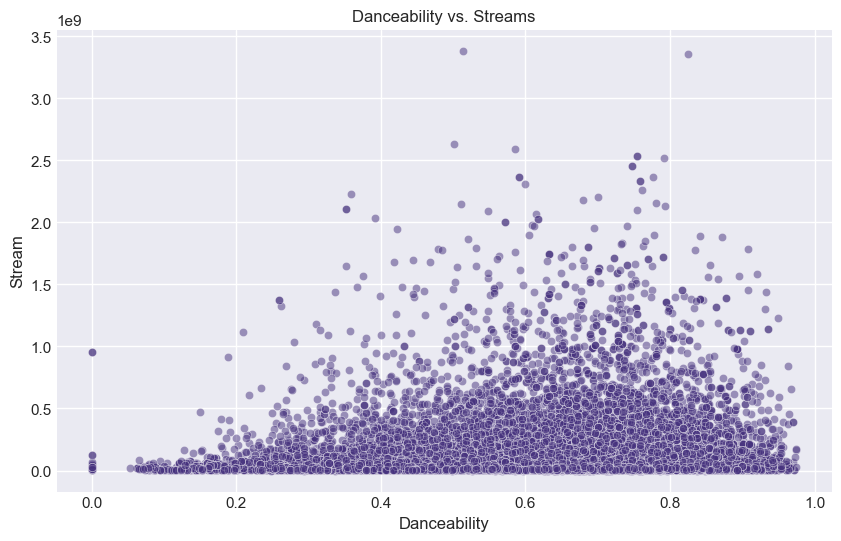

In [166]:
# Scatter plot: Danceability vs. Stream
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Danceability', y='Stream', alpha=0.5)
plt.title('Danceability vs. Streams')
plt.xlabel('Danceability')
plt.ylabel('Stream')
plt.show()

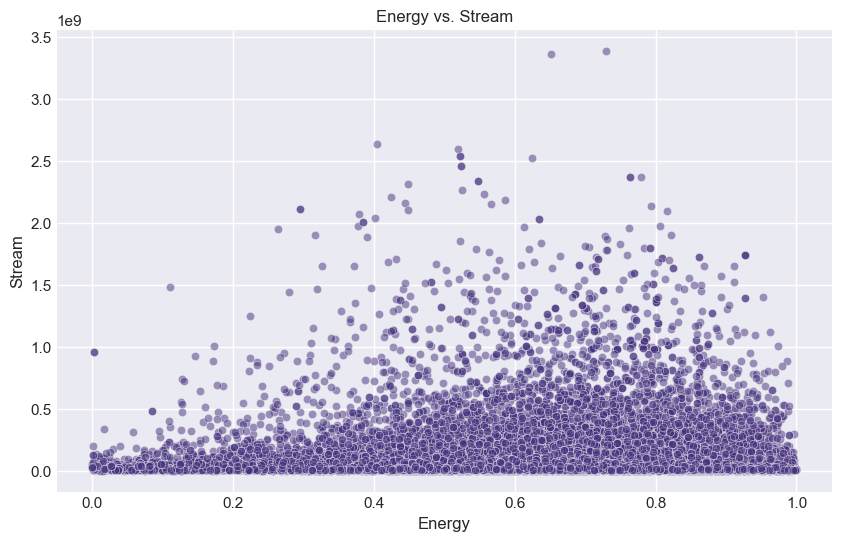

In [141]:
# Scatter plot: Energy vs. Stream
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Energy', y='Stream', alpha=0.5)
plt.title('Energy vs. Stream')
plt.xlabel('Energy')
plt.ylabel('Stream')
plt.show()

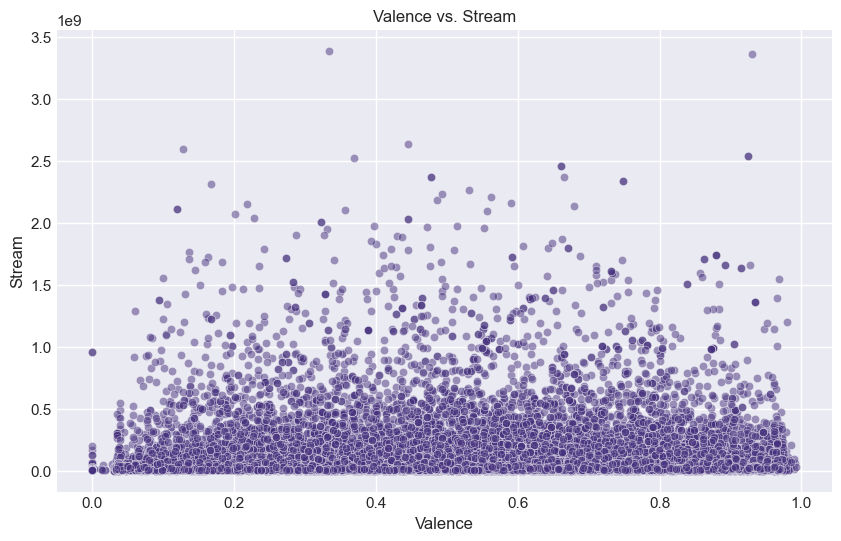

In [143]:
# Scatter plot: Valence vs. Stream
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Valence', y='Stream', alpha=0.5)
plt.title('Valence vs. Stream')
plt.xlabel('Valence')
plt.ylabel('Stream')
plt.show()

## Análise Consolidada da Relação entre Características Musicais e Popularidade (Stream)

Os gráficos de dispersão analisados exploram a relação entre três características musicais do Spotify ("Danceability", "Energy" e "Valence") e a popularidade das faixas, medida pelo número de "Stream"s. A análise consolidada dos gráficos revela os seguintes insights:

* **Ausência de Correlação Linear Forte:** Em todos os três gráficos, observa-se uma ausência geral de uma forte correlação linear entre as características musicais e o número de streams. Os pontos estão amplamente dispersos, indicando que músicas com valores semelhantes de "Danceability", "Energy" ou "Valence" podem ter números de streams muito diferentes.

* **Concentração de Dados em Baixos Streams:** A maioria das músicas, independentemente dos seus valores de "Danceability", "Energy" ou "Valence", tende a ter um número relativamente baixo de streams. Essa concentração de dados na parte inferior dos gráficos sugere que a maioria das faixas não atinge altos níveis de popularidade.

* **Leve Tendência de Aumento com Danceability:** No gráfico "Danceability vs. Stream", há uma leve tendência de que músicas com maior "Danceability" possam ter um número ligeiramente maior de streams. No entanto, essa tendência é fraca e há muitas exceções, com músicas menos dançantes também alcançando alta popularidade.

* **Nenhuma Tendência Clara com Energy e Valence:** Os gráficos "Energy vs. Stream" e "Valence vs. Stream" não mostram nenhuma tendência clara. Músicas com alta e baixa "Energy" ou "Valence" podem ter um número alto ou baixo de streams, indicando que essas características não são fortes preditores de popularidade.

* **Influência de Outros Fatores:** A grande dispersão dos dados e a ausência de correlação forte sugerem que outros fatores não considerados nesta análise desempenham um papel mais significativo na determinação da popularidade de uma música no Spotify. Esses fatores podem incluir o artista, gênero, marketing, tendências, contexto cultural, etc.

* **Limitações da Análise Univariada:** É importante notar que essa análise é univariada, ou seja, examina a relação de cada característica musical individualmente com a popularidade. Uma análise multivariada, que considera a interação entre várias características musicais, pode revelar padrões mais complexos.

**Conclusão:**

Com base na análise dos gráficos de dispersão, as características musicais "Danceability", "Energy" e "Valence" não parecem ser fortes preditores isolados da popularidade de uma música no Spotify. A popularidade de uma faixa é provavelmente influenciada por uma combinação complexa de fatores, e a análise dessas características isoladamente não captura toda a dinâmica envolvida.

In [162]:
caminho_arquivo_csv = os.path.join(os.path.expanduser("~"), "Downloads", "meu_arquivo.csv")
df.to_csv(caminho_arquivo_csv, index=False, sep=';', encoding='utf-8-sig')
                        

# 1. Comparativo YouTube vs Spotify
## Objetivo: Avaliar o desempenho das músicas nas duas plataformas e entender se há alguma correlação entre visualizações no YouTube e streams no Spotify.

Resultado:
A análise de correlação mostrou que existe uma correlação positiva moderada entre o número de visualizações no YouTube e os streams no Spotify (correlação ≈ 0.60). Embora não seja uma relação extremamente forte, indica que músicas que performam bem em uma plataforma tendem a ter um bom desempenho na outra também — ainda que outros fatores possam estar em jogo, como o tipo de público de cada plataforma.

Além disso, a relação entre Likes e Streams (0.65) reforça a ideia de que o engajamento do público no YouTube pode refletir na popularidade no Spotify.

# 2. Análise de Engajamento no YouTube
Métrica utilizada:

Engajamento = (Likes + Comentários) / Visualizações

Resultado:
Foi calculada a taxa de engajamento para cada música, resultando em um ranking das faixas com maior envolvimento do público. Algumas músicas com número relativamente menor de visualizações se destacaram nesse ranking, o que sugere que o engajamento não depende apenas da popularidade, mas também da conexão emocional com o conteúdo, fandoms específicos, ou campanhas de marketing.

Insight principal:
Músicas com alto engajamento nem sempre são as mais visualizadas, mas mostram potencial para viralização e lealdade do público.

# 3. Características Musicais e Popularidade no Spotify
Objetivo: Investigar se atributos musicais como danceability, energy e valence estão associados à popularidade das músicas.

Resultado:

As análises gráficas mostraram tendências leves: faixas mais populares tendem a ter valores intermediários a altos de dançabilidade e energia, indicando que músicas animadas têm mais chances de serem populares.

A variável valence (associada a positividade emocional) apresentou uma relação menos clara, indicando que tanto músicas “felizes” quanto “melancólicas” podem fazer sucesso, dependendo do contexto.

## Conclusão:
As características musicais têm alguma influência sobre a popularidade, mas não são determinantes isolados. Outros fatores externos como marketing, artista, letra e momento do lançamento também exercem papel importante.